In [1]:
import csv

from dice import ScoreBasedPlayer, Game
from collections import defaultdict
from simulations import turn_based_simulations

In [2]:
max_scores = [50*i for i in range(2,30)]
num_games = 10000
player_scores = range(50,1000,50)

In [3]:
scores = defaultdict(float)

In [4]:
for score in max_scores:
    scores[score] = turn_based_simulations([player_score for player_score in player_scores],num_games=num_games,max_player_scores=score)

In [5]:
with open('scoredbasedloopedopponentscores.csv',mode='w',newline='') as file:
    wr = csv.writer(file,delimiter=',')
    wr.writerow(['MaxOpponentScore','Score','WinPercentage','AverageOpponentScore'])
    for score in max_scores:
        for key,value in scores[score].items():
            wr.writerow([score,key,value[0],value[1]])

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r'scoredbasedloopedopponentscores.csv')
df

,MaxOpponentScore,Score,WinPercentage,AverageOpponentScore
0,100,50,0.1649,50.000
1,100,100,0.4184,50.000
2,100,150,0.6878,50.000
3,100,200,0.7832,50.000
4,100,250,0.8282,50.000
...,...,...,...,...
527,1450,750,0.1900,725.013
528,1450,800,0.1582,724.186
529,1450,850,0.1361,726.820
530,1450,900,0.1267,725.393


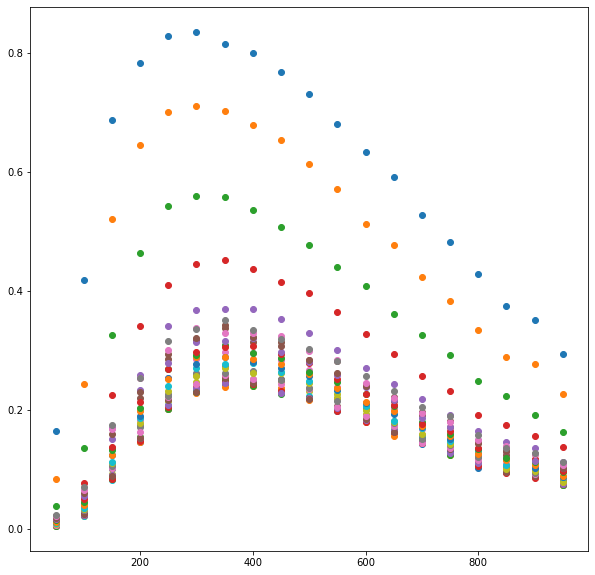

In [9]:
fig,ax = plt.subplots(1,figsize=(10,10))
for score in df.MaxOpponentScore.unique():
    temp_df = df.loc[df.MaxOpponentScore == score]
    
    ax.scatter(temp_df.Score,temp_df.WinPercentage)
    